# Introduction to finite differences

## Refresher on finite Taylor series
Feel free to skip this section if you feel comfortable with these concepts.

```{admonition} Big idea : Local approximation of a function
:class: tip
We can compute a series expansion for a function in powers of $x$ using Taylor series. The resulting truncated polynomial gives a good local approximation to a function in a sense made precise by the Lagrange remainder theorem. If the truncated polynomial is used near the expansion point $a$ then its accuracy "goes like" the $n^{\text{th}}$ power of the distance from $a$.
```
   
### Taylor expansion definition
We will write the formula for expansion about $x=a$, in which we seek to express $f(x)$ as an infinite polynomial of the form

$$\begin{equation} p(x;a)=\sum_{j=0}^{\infty}c_n(x-a)^n = c_0 +c_1(x-a)+c_2(x-a)^2+\dots +c_n(c-a)^n+\dots\end{equation}$$

We choose the coefficients $c_n$ to ensure that the $n^{\text{th}}$ derivative of the polynomial is equal to the $n^{\text{th}}$ derivative of the function at the point $x=a$. In this sense, the Taylor series gives the best possible local polynomial approximation to $f(x)$ of specified degree. By repeatedly differentiating and evaluating the polynomial, we obtain 

$$\begin{equation}c_n=\frac{f^{(n)}(a)}{n!}\end{equation}$$ 

This result defines the Taylor series for $f(x)$, given in the box below.

```{admonition} Taylor series for $f(x)$ about a point $x=a$.

$\begin{equation}p(x;a) = \sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n!}(x-a)^n\end{equation}$

The special case when $a=0$ is known as the Maclaurin series for historical reasons.
```

```{admonition} **A disclaimer!**
:class: warning
Not all functions are faithfully represented by their Taylor Series. We have only guaranteed that the polynomial has the "correct" behaviour in the immediate vicinity of the point $x=a$. Two things should be checked:

1. Does the series converge to a finite value for all $x$? <br>
We can find the radius of convergence by using the ratio test
1. Does it converge to $f(x)$? <br>
We must show that $\displaystyle \lim_{k\rightarrow \infty}|f(x)-p_k(x;a)|=0$, which may only be true for some values of $x$.
This can be done by making use of the Lagrange remainder theorem, introduced in the next subsection.
```

Functions which converge to their Taylor series are called analytic, and functions which converge to their Taylor series everywhere are called entire. The sine and cosine series, and the $e^x$ series are entire. The Maclaurin series for $\ln(1+x)$ is analytic for $|x|<1$.


### Practical use
The Taylor series nearly always contains an infinite number of terms. To be of practical use in numeric applications, we need to "truncate" the expansion, meaning that we retain only the terms up to a specified $n^{\text{th}}$ power of $x$. As well as considering the validity of the infinite series, it is important to be able to determine how many terms in the series are needed for practical use. If the series converges very slowly, then it may not be much good!

The Lagrange remainder theorem, given in the box below, allows us to place precise bounds on the size of the error. The result shows that the error in the truncated expansion is proportional to the next power of $(x-a)$.

```{admonition} Lagrange remainder theorem

Let $p_n(x;a)$ be the truncated Taylor expansion of $f(x)$ about point $x=a$, up to and including the term in $(x-a)^n$.

The remainder (error) in the truncated expansion is given by:

$$\begin{equation}R_n(x) = \biggr|f(x)-p_n(x;a)\biggr| = \biggr|\frac{f^{n+1}(\xi)(x-a)^{n+1}}{(n+1)!}\biggr|, \qquad \xi\in(a,x)\end{equation}$$
```

We say that the degree $n$ series has "order $(x-a)^n$ accuracy", and we may write

$$\begin{equation}f(x)=p_n(x;a)+\mathcal{O}((x-a)^{n+1})\end{equation}$$

where the big-O notation describes the order of the error terms.

The power-relationship in Lagrange's theorem can be anticipated when $(x-a)$ is small, and for larger differences by noting that factorial growth (of the coefficient denominators) is much faster than algebraic (polynomial) growth. The proof, and derivation of the coefficient of $(x-a)^n$ is found by using the mean value theorem. It won't be of much benefit for our practical purposes to show the proof here, but I'm happy to provide it if you want to see it. Instead, let us take a look at an illustrative example.

   
#### Example

Use the Lagrange remainder theorem to compute an upper bound for the size of the error in the quadratic expansion of $\sin(x)$ about $x=\frac{\pi}{3}$, at a nearby point $x=\frac{\pi}{2}$.

   
#### Solution

The series expansion is found to be:

$$\begin{equation}p_2(x;\pi/3)=\frac{\sqrt{3}}{2}+\frac{1}{2}\biggr(x-\frac{\pi}{3}\biggr)-\frac{\sqrt{3}}{4}\biggr(x-\frac{\pi}{3}\biggr)^2\end{equation}$$

And from Lagrange's formula, the error in the expansion at $x=\frac{\pi}{2}$ is given by:

$$\begin{equation}R(\xi)= \biggr|\frac{\cos(\xi)(\frac{\pi}{2}-\frac{\pi}{3})^3}{6}\biggr| \end{equation}$$

Since $|\cos(\xi)|$ is bounded above by $1$ on the given domain, Lagrange's remainder theorem gives an upper bound of $\frac{\pi^3}{6^4}=0.0239246$

The exact error is 

$$\begin{equation}\biggr|\sin\left(\frac{\pi}{2}\right)-p_2\left(\frac{\pi}{2};\frac{\pi}{3}\right)\biggr| = 0.0091119\end{equation}$$

---
## Finite derivative formulae

```{admonition} Big idea : Local approximation of derivatives
:class: tip
We can truncate and manipulate Taylor's series to obtain algebraic approximation for first and second (and higher) derivatives involving weighted averages of neighbouring points.
```
   
### Forward difference approximation
Discarding all terms of degree greater than one in Taylor's formula for expansion about $x=x_k$ gives:

$$\begin{equation}y(x)= y(x_k)+y^{\prime}(x_k)(x-x_k)+\mathcal{O}((x-x_k)^2)\end{equation}$$

This approximation is good if $|x-x_k|\ll 1$, where the notation $\ll$ means "much less". If we label $h=(x-x_k)$, then we may rewrite the expression as shown in the box below. The result is known as Euler's forward difference formula or the explicit Euler method.

```{admonition} Euler's forward difference formula

$$\begin{equation}y(x_k+h)= y(x_k)+y^{\prime}(x_k)h +\mathcal{O}(h^2), \qquad h\ll 1\end{equation}$$
```
  
A simple rearrangement of Euler's forward difference formula gives the following expression for the derivative at $x_k$.

$$\begin{equation}y^{\prime}(x_k)= \frac{y(x_k+h)-y(x_k)}{h}+\mathcal{O}(h)\end{equation}$$

This result, which is illustrated graphically below, is familiar from our early work on calculus. The derivative is formally defined as the limiting case where $h\rightarrow 0$. However, we will treat $h$ as a small-but-finite quantity, which introduces an order $h$ truncation error. We say that the result is zeroth order accurate. Some applications of this approximation are given in the next sections of the notes.

```{image} images/secant.png
:alt: secant
:height: 300px
:align: center 
```

There are other finite difference formulas that can be obtained from Taylor's series, by taking weighted sums of expansions about different points to eliminate unwanted terms in the series. Some of them are favoured because they exhibit higher order accuracy than Euler's formula, whilst others may be favoured in practical applications for their numeric stability, computational efficiency or ease of practical implementation. A few examples of finite difference formulas are given below, though this list is far from exhaustive.

You may notice that the forward, backward and central differences formulae are simply grid-shifted versions of each other. However, this property does not extend to other finite difference formulae. 

       

### First derivative formulae
**Forward difference** (order $h$ accuracy) :

$$[1]\quad \displaystyle y_{k+1}=y_k + h y^{\prime}_k + \frac{h^2}{2!}y^{\prime\prime}_k +\frac{h^3}{3!}y^{\prime\prime\prime}_k + \frac{h^4}{4!}y^{(4)}_k + \frac{h^5}{5!}y^{(5)}_k + \dots \qquad \text{where }  y_{k+1}=y(x_k+h)$$

$$\Rightarrow \quad y^{\prime}_k\displaystyle= \frac{y_{k+1}-y_k}{h} + h\left[-\frac{1}{2}y^{\prime\prime}_k - \frac{h}{3!}y^{\prime\prime\prime}_k - \frac{h^2}{4!}y^{(4)}_k - \frac{h^3}{5!}y^{(5)}_k + \dots\right]$$

The result is obtained by expanding taking $x=(x_k+h)$,  $a=x_k$ in the Taylor expansion


**Backward difference** (order $h$ accuracy) :

$$[2] \quad \displaystyle y_{k-1}=y_k - h y^{\prime}_k + \frac{h^2}{2!}y^{\prime\prime}_k -\frac{h^3}{3!}y^{\prime\prime\prime}_k + \frac{h^4}{4!}y^{(4)}_k - \frac{h^5}{5!}y^{(5)}_k + \dots \qquad \text{where }  y_{k-1}=y(x_k-h)$$

$$\Rightarrow \quad y^{\prime}_k = \frac{y_{k}-y_{k-1}}{h} + h\left[\frac{1}{2}y^{\prime\prime}_k - \frac{h}{3!}y^{\prime\prime\prime}_k + \frac{h^2}{4!}y^{(4)}_k - \frac{h^3}{5!}y^{(5)}_k + \dots\right]$$

The result is obtained by expanding taking $x=x_k$,  $a=(x_k+h)$ in the Taylor expansion

    
**Central difference** (order $h^2$ accuracy):

$$[1]-[2] \Rightarrow \quad \displaystyle y^{\prime}_{k} = \frac{y_{k+1} - y_{k-1}}{2h}+h^2\left[-\frac{2}{3}y^{\prime\prime}_k+\dots\right]$$
   
or (by replacing $h$ with $h/2$)
$$\phantom{[1]-[2] \Rightarrow}\quad \displaystyle y^{\prime}_{k} = \frac{y_{k+1/2}-y_{k-1/2}}{h}+\frac{h^2}{4}\left[-\frac{2}{3}y^{\prime\prime}_k+\dots\right] \qquad \text{where }  y_{k\pm1/2}=y(x_k\pm h/2)$$


### Second derivative formulae
**Forward difference** :

$$\displaystyle y_{k+2}=y_{k}+2hy^{\prime}_{k}+\frac{(2h)^2}{2!}y^{\prime\prime}_{k}+\frac{(2h)^3}{3!}y^{\prime\prime\prime}_k\dots \qquad \text{where } y_{k+2}=y(x_k+2h)$$

$$\displaystyle\Rightarrow y^{\prime\prime}_k = \frac{y_{k}-2y_{k+1}+y_{k+2}}{h^2}-hy^{\prime\prime\prime}_k+\dots$$

   
**Central difference** :

$$[1]+[2] \Rightarrow \quad \displaystyle y^{\prime\prime}_k = \frac{y_{k-1}-2y_k+y_{k+1}}{h^2} + h^2\left[-\frac{1}{12}y^{(4)}_k +\dots\right]$$

   

### Discussion
Euler's formula is rarely used in problems of real practical importance, as it often requires impractically small integration steps to achieve the required accuracy goal. However, it does appear as a sub-step in some other important formulas that we will encounter in the section on multistep methods.

The central difference formulas are of particular importance. They are very heavily used in numeric methods because they achieve a good balance between simplicity, stability and accuracy. The central difference formulas estimate the slope at each point by using a weighted combination of points on each side. The graphic below provides an indication of why this usually gives a better estimate. The sketch indicates that the slope of the secant line between adjacent coordinates gives a better approximation to the gradient at the midpoint of the interval than at either of the endpoints.

``` {image} images/midpoint.png
:alt: midpoint rule
:height: 300px
:align: center 
```
 
````{panels}
**Hand derivation exercise**:

The given results for the first derivative all require only two points to calculate. Can you derive a result from the Taylor series that uses three points $[y_k,y_{k+1},y_{k+2}]$ to calculate an estimate of the first derivative $y^{\prime}(x_k)$ that gives quadratic order accuracy?
---
```{admonition} Hint
:class: tip
Start by expanding $y(x_k+2h)$ and $y(x_{k+h})$ and use a weighted combination of these two expansions that eliminates the second derivative terms.
```
````
---
## Derivative calculations
```{admonition} Big idea : Discretisation
:class: tip
We can use the finite difference formulae to estimate the derivative of a function described by a discrete set of points $(x_k,y_k)$.

Obtaining the derivative at the end-points may require us to know the function value at phantom grid-points outside the grid domain.
```
   
### Using forward differences
Suppose that instead of being given an analytic function $y(x)$, we have a set of (e.g. experimental) points

$$\begin{equation}(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n).\end{equation}$$

We can approximate the derivative of the hypothetical function described by these points, using the forward difference estimate

$$\begin{equation}y_k^{\prime}\simeq\frac{y_{k+1}-y_k}{x_{k+1}-x_k}.\end{equation}$$

For simplicity we will assume that the grid spacing $h_k=(x_{k+1}-x_k)$ is the same value $h$ for all neighbours (though this isn't necessary), which gives:

$$\begin{align}y^{\prime}&=\biggr[\frac{y(x_2)-y(x_1)}{h},\frac{y(x_3)-y(x_2)}{h},\dots,\frac{y(x_n)-y(x_{n-1})}{h}\biggr]\\&=\frac{[y_2,y_3,\dots,y_n]-[y_1,y_2,\dots,y_{n-1}]}{h}\end{align}$$

The idea, which is not very sophisticated, is illustrated in the schematic diagram below. Essentially, we are joining up the points with straight lines and using the slope of those line segments to estimate the gradient at the left-hand point of each interval.

Notice that with $n$ experimental points we can only find the derivative at the first $(n-1)$ points, because the forward projection of the function at the final point is not known. If we wish to obtain the derivative at $x_n$, we require the phantom exterior value $(x_{n+1},y_{n+1})$. 

```{image} images/griddly3.png
:alt: computing the derivative from secant lines
:height: 300px
:align: center 
``` 

The code below provides an implementation of the formula for a given set of points $(x,y)$.

In [1]:
def forward_diff(x,y):
    
    # Assuming equal grid spacing h
    h = x[1]-x[0]
    fd = (y[1:]-y[0:-1])/h

    # OR
    # No assumption of equal grid spacing
    fd = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

    return fd

**Example**:

We will demonstrate for the function

$$\begin{equation}y=\sin(x)+x, \quad y(-\pi)=-\pi\end{equation}$$

To obtain a result for the derivative at a set of points including the endpoint, we will extend the grid by adding a phantom exterior point at the right hand side.

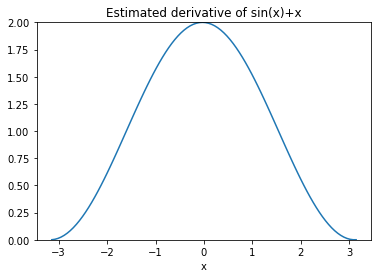

In [2]:
import numpy as np
from math import pi, sin
import matplotlib.pyplot as plt

x = np.linspace(-pi,pi,100)
h = x[1]-x[0]
xx = np.insert(x,len(x), pi+h)
yy = list(map(lambda a: sin(a), xx)) + xx

fd = (yy[1:]-yy[:-1])/h

plt.plot(x, fd)
plt.xlabel('x')
plt.title('Estimated derivative of sin(x)+x')
plt.ylim(0,2)
plt.show()

```{note}
The relevant packages were imported here (numpy, math, matplotlib), therefore no longer need importing in the next sections. But make sure you do import them if you are running some of the sections independently.
```
```{admonition} Discretisation tip
:class: tip
In the above example we allowed python to compute the grid points, by using linspace to ensure that the right-hand end point was included. However, for some applications it may not be convenient to use linspace.

If you want to compute the step size $h$ that will discretise a domain with the right-hand end point included, it is useful to recognise that the $x$ values in the grid are in arithmetic progression. If the first term is $a$, then the last term is $a+(n-1)h$, where $n$ is the number of points. This gives the following result for an interval $[a,b]$

$$\begin{equation}a+(n-1)h=b \quad \Rightarrow\quad h=\frac{b-a}{n-1}\end{equation}$$
```

### Using central differences
Assuming again an equal grid spacing $h$, we can use either of the following two results

$$\displaystyle y_k^{\prime}\simeq\frac{y_{k+1/2}-y_{k-1/2}}{h}$$

This result requires the function values at the midpoint of each pair of grid values. It is convenient to relabel the index, so that the subscript on the right had side of the formula matches the numbering of the gridpoints, giving $y_{k+1/2}^{\prime}\simeq\frac{y_{k+1}-y_{k}}{h}$. This result is identical to the forward derivative estimate, but it should be interpreted as the derivative of the function at the mid-point of each interval, rather than at the left-hand point.

$$\displaystyle y_k^{\prime}=\frac{y_{k+1}-y_{k-1}}{2h}$$

This result gives an estimate of the derivative at the original grid locations for the derivative at the interior points $[x_2,x_3,\dots,x_{n-1}]$. Computing the derivative at the two end-points requires the function value $y$ at phantom exterior points $x_{0}$ and $x_{n+1}$, as shown below, which is given to match the example in the previous section.

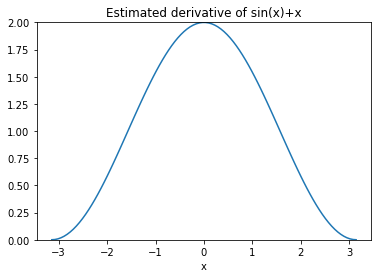

In [3]:
x = np.linspace(-pi,pi,100)
h = x[1]-x[0]
xx = np.insert(x,[0,len(x)],[-pi-h, pi+h])
yy = list(map(lambda a: sin(a), xx)) + xx

fd = (yy[2:]-yy[:-2])/(2*h)

plt.plot(x, fd)
plt.xlabel('x')
plt.title('Estimated derivative of sin(x)+x')
plt.ylim(0,2)
plt.show()

### Demonstrating the truncation error
To illustrate the accuracy of the formulae, we can compute the maximum error in the approximation for a range of step sizes and plot the result. Since the resulting errors $E$ are proportional to $h^n$, a plot of $\ln(E)$ against $\ln(h)$ should show a linear relationship. The gradient of the line gives the estimated order of the truncation error, $n$. We find (as expected) that the formula based on forward differences has a first order error relationship and the formula based on central differences has a quadratic order error relationship.

forward estimated n= 0.99906

central estimated n= 1.99830



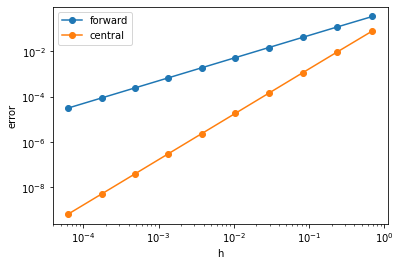

In [4]:
from math import cos
from matplotlib.pyplot import subplots, show

def fdiff(x, fun, type):

    h=x[1]-x[0]
    if type =='forward':
        xx = np.insert(x,len(x), x[-1]+h)
        yy = fun(xx)
        fd = (yy[1:]-yy[:-1])/h
    elif type == 'central':
        xx = np.insert(x,[0,len(x)],[x[0]-h, x[-1]+h])
        yy = fun(xx)
        fd = (yy[2:]-yy[:-2])/(2*h)

    return fd


num_h=10
hvals = 2*pi/(np.logspace(1,5,num_h)-1)

fig, ax = subplots()

for _,method in enumerate(['forward', 'central']):
    Evals = np.zeros(hvals.shape)
    fun = lambda a: list(map(lambda x: sin(x), a)) + a
    for i in range(num_h):
        # Set up grid 
        h=hvals[i]
        x= np.arange(-pi,pi,h)

        fd = fdiff(x,fun,method)
        dydx = np.asarray(list(map(lambda b: cos(b), x))) + 1

        err = abs(dydx-fd)
        Evals[i] = max(abs(err))

    ax.loglog(hvals,Evals,'-o', label=method)

    # Fitting degree 1 polynomial
    p = np.polyfit(np.log(hvals), np.log(Evals), 1)
    # Truncation error
    print(method, 'estimated n= {:.5f}\n'.format(p[0]))

ax.set_xlabel('h')
ax.set_ylabel('error')
ax.legend()
show()

   
### <span style="color: red;">Coding challenge</span>
See if you can compute the second derivative of the function 

$$\begin{equation}\sin(x)+x, \quad x\in[-\pi,\pi],\end{equation}$$ 
using either the forward or central difference formula. You will need to extend the function estimate at *two* exterior points to obtain a result for the derivative at each point in the interval.

   
**Appendix: The difference between truncation errors and roundoff errors**

Truncation errors occur due to working with finite approximations to infinitesimal quantities, whilst the roundoff errors are a computational artefact due to working with finite precision arithmetic. Numeric computation packages ordinarily use floating point representation of numbers which are very efficient and represent numbers faithfully to around 16 digits. 

It is possible to increase the working precision of a calculation to a specified degree by using variable-precision arithmetic. However, this results in a significant slowdown in computational speed. For most practical purposes, floating point precision is sufficient.

---
## Initial value problems

```{admonition} Big idea : From derivatives to differences
:class: tip
Substitution of finite difference formulae into a differential equation results in a system of algebraic equations that either can be directly rearranged (this section) or solved using root-finding techniques (next section).
```

### Numeric solution of an initial value problem
We can use the Euler forward difference formula to solve an initial value problem (IVP) of the form

$$\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=f(x), \quad y(x_0)=y_0\end{equation}$$

Recalling that 

$$y(x_k+h)= y(x_k)+y^{\prime}(x_k)h+\mathcal{O}(h^2)$$

and using the given differential equation to replace the derivative leads to the following iterative formula:

$$\begin{equation}y(x_k+h)= y(x_k)+f(x_k)h+\mathcal{O}(h^2)\end{equation}$$

The formula uses the known value $(x_k,y_k)$ together with the known slope at that point to project forward to the next point. The calculation is then repeated at the new point, and in this manner we keep stepping forward until we reach the end of the integration domain. We start at the given initial value $(x_0,y_0)$.

A graphical illustration is provided below, demonstrating how each forward step takes us in tangent to one of the family of general solution curves. The approximation would be better for smaller step size!

```{image} images/forward1.png
:alt: forward stepping
:height: 200px
:align: center 
```

In subsequent work we will often use $y_k$ to refer to $y(x_k)$ for neatness. The result, which is known as the explicit Euler method is therefore written as 

$$\begin{equation}y_{k+1}\simeq y_k + h f(x_k)\end{equation}$$


**Example**:

The below Python script uses the forward difference formula to obtain a numeric estimate of the solution to the problem

$$\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=\cos(x)+1, \quad y(-\pi)=-\pi\end{equation}$$

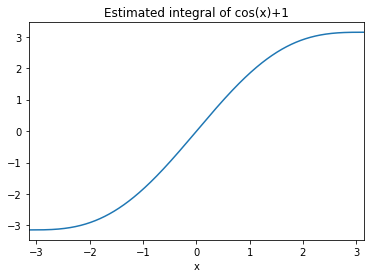

Maximum error: 0.006289469598703877


In [5]:
n=1000
h = 2*pi/(n-1)
x = [-pi]
y = [-pi]

for k in range(n-1):
    x.append(x[k] + h)
    y.append(y[k] + h*(cos(x[k])+1))

plt.plot(x,y)
plt.xlabel('x')
plt.xlim(-pi,pi)
plt.title('Estimated integral of cos(x)+1')
plt.show()

# Maximum error
y = np.array(y)
x = np.array(x)
print('Maximum error:', max(abs(y-[sin(a)+a for a in x])))

      

### Local and global errors
The trunctation error in the explicit Euler method is order $h^2$. It is the size of error introduced at each step. As we are integrating over $1/h$ steps, we may therefore expect that by the time we reach the end of the integration domain the error may be "going like" $h$. We say that the local error is order $h^2$ and the global error is order $h$.

This heuristic description is fairly accurate. However, the detailed picture is a little more complicated, as for some problems the local errors are amplified/compounded in subsequent steps, whilst in other problems the errors are damped out. We will see some examples in the next section.

   
### <span style="color: red;">Coding challenge</span>
Edit the code given above using forward difference formula so that it uses the central difference formula

$$\begin{equation}y_{k+1}\simeq y_k + h y^{\prime}_{k+1/2}\end{equation}$$

You should find that the maximum error in your expansion is 1.6482e-06

```{admonition} Hint
:class: tip
Although labelled a "challenge", the solution to this question requires very,very minimal changes to the given code.
```
    
```{note}
The use of geometric integral approximation formulae such as the left-hand rectangle rule, mid-point rectangle rule or Simpson’s rule can also be used for numeric integration of initial value problems. The results found this way are identical to the Taylor series formulae and the geometric arguments can help to motivate the methods. However, Taylor’s theorem is required to quantify the size of the analytic error in each case.
```

---
## Explicit vs implicit methods

```{admonition} Big idea : Stiffness and stability
:class: tip
Explicit algorithms tend to be easier to implement than implicit algorithms, and are less computationally demanding for a given step size.

Implicit algorithms tend to exhibit better stability properties, which is particularly important for problems which are numerically "stiff".
```
   
### Non-autonomous initial value problems
So far we have only looked at initial value problems of the form $\frac{\mathrm{d}y}{\mathrm{d}x}=f(x)$, where the derivative is given fully in terms of $x$. Differential equations which do not explicitly depend on the independent variable are called autonomous.

We now consider the more general non-autonomous initial value problem given by:

$$\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=f(x,y), \quad y(x_0)=y_0.\end{equation}$$

Schemes for solving this problem based on the forward and backward difference formulae are given below, with some discussion of their stability properties. Some further formulae will be outlined in the next section on multi-stage methods.


<u>**Forward difference (explicit Euler scheme)**</u>

Substituting the given result for the derivative into the forward difference formula result in 

$$\begin{equation}y(x_k+h)\simeq y(x_k)+h f(x_k,y_k)\end{equation}$$

This gives an explicit result for $y_{k+1}$ in terms of the values $x_k$ and $y_k$ from the previous step, which can be calculated straightforwardly in the same manner we used for the explicit problem. An example implementation is shown in the function code below

In [6]:
def my_eulr(f,x,y0):

    nstep = len(x)
    h = x[1]-x[0]
    y = [y0]

    for k in range(nstep-1):
        y.append(y[k]+h*f(x[k],y[k]))
    return y

Here is a demonstration of the solution using this code for the problem

$$\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=-y+(\cos(x)+2)y^2, \quad y(0)=0.4, \quad x\in[0,4]\end{equation}   $$

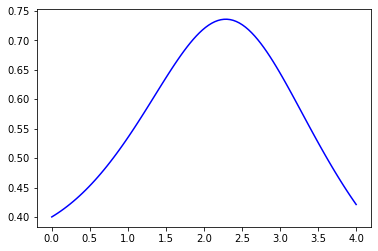

In [7]:
f = lambda x,y: -y+(cos(x)+2)*y**2
x = np.linspace(0,4,100)
y = my_eulr(f,x,0.4)
plt.plot(x,y, 'b')
plt.show()

If you would like to compare this solution to the analytic result, it is given by 

$$\begin{equation}\frac{2}{4+\cos(x)-\sin(x)}\end{equation}$$

<u>**Backward difference (implicit Euler scheme)**</u>

$$\begin{equation}y(x_k+h)\simeq y(x_k)+h f(x_k,y(x_k+h))\end{equation}$$

Here, things begin to get a bit more complicated, since the expression for $y_{k+1}$ is given implicitly. Usually it is not possible to rearrange the expression to obtain $y_{k+1}$ explicitly, so a root-finding algorithm is required, such as the Newton-Raphson technique or a bisection or fixed point algorithm. An example implementation is shown in the code below

In [8]:
def my_eulri(f,x,y0):
    nstep = len(x)
    h = x[1]-x[0]
    y = [y0]

    for k in range(nstep-1):
        x2 = x[k+1]
        y1 = y[k]

        F = lambda y2: (y2-y1-h*f(x2, y2))
        y.append(fsolve(F,y1))

    return y

       
**<u>Trapezoidal rule</u>**

Taking the average of the forward and backward difference formulae gives

$$\begin{equation}y_{k+1}=y_k+\frac{h}{2}\biggr[f(x_k,y_k)+f(x_{k+1},y_{k+1})\biggr]\end{equation}$$

This result is equivalent to approximating the integral using the trapezium rule. It can be shown that the global error in this formula is $\mathcal{O}(h^2)$, whilst the global errors in the explicit and implicit Euler methods are both $\mathcal{O}(h)$.

The trapezoidal rule is also an implicit rule. It can be implemented using a minimal modification of the backward difference algorithm outlined above.

    
### Stability
The implicit Euler algorithm typically requires a root-solving algorithm (expensive) and it only offers the same order accuracy as the explicit Euler algorithm, since the error goes like $h$ in each case… So why do we need it?

We will consider an illustrative example, provided by the problem

$$\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=-5y, \quad y(0)=2, \quad y\in[0,10]\end{equation}$$

First, let us demonstrate the solutions obtained for step size $h=0.41$, using each algorithm:

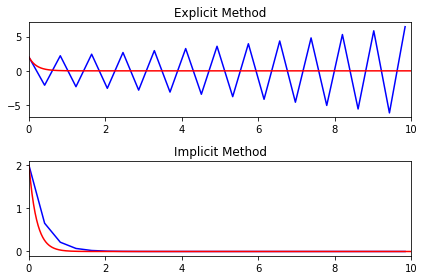

In [9]:
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import fsolve

h = 0.41
x=np.arange(0,10,h)
f = lambda x,y: -5*y
ye = my_eulr(f,x,2)
yi = my_eulri(f,x,2)

xsol = np.linspace(0,10,1001)
ysol = 2*np.exp(-5*xsol)

fig,ax = plt.subplots(2,1)
ax[0].plot(x,ye,'b',xsol,ysol,'r')
ax[0].set_title('Explicit Method')
ax[0].set_xlim(0,10)
ax[1].plot(x, yi, 'b', xsol, ysol, 'r')
ax[1].set_title('Implicit Method')
ax[1].set_xlim(0,10)
fig.tight_layout()
plt.show()

In each plot, the numeric estimate is shown in blue and the analytic solution is shown in red. 

Both the explicit and implicit Euler solutions have the same level of accuracy over a single step. However, in this example the errors in the explicit solution are amplified, whilst in the implicit solution they are damped. The implicit method is more stable for this example.

**<u>Analysis for this problem</u>**

This example can be fully analysed by hand. Since it is linear, a root finding method is not needed to implement the backward formula. We can simply rearrange to obtain an explicit solution for $y_k$. In both cases, the resulting expression for $y_{k+1}$ can be applied recursively to obtain a closed form discrete solution in terms of the step size $h$ and the initial condition $y_0$. The details for each method are shown below.

The **explicit formula** gives

$$\displaystyle y_{k+1}= (1-5h)y_k \quad \Rightarrow \quad y_{k+1}=(1-5h)^{k+1}y_0, \qquad x=kh$$

The **implicit formula** gives

$$\displaystyle y_{k+1}=\frac{y_k}{1+5h} \quad \Rightarrow \quad y_{k+1}=\frac{y_0}{(1+5h)^{k+1}}, \qquad x=kh$$

Since $\displaystyle \lim_{h\rightarrow 0}(1\pm 5 h)^{x/h} = e^{\pm 5x}$, both of these results converge to the analytic solution $y=2e^{-5x}$ in the limit of small step sizes.

However, for $|1-5h|>1$, the explicit Euler method displays oscillating growth (i.e. for $h>2/5$).

In general, for (dynamically) stable ODEs with a fast decaying or highly oscillatory mode, the explicit Euler method demands small step sizes. These types of ODE are called "stiff". The implicit Euler method is also more stable than the trapezoidal method.

**How is stability assessed in practical problems?**  

Comparison of the local and global errors can give us an indication of the stability properties of the algorithm. The local errors generally ought to remain proportional to the size of the neglected terms in the truncated expansion. If these errors are growing then the algorithm is not stable.

The size of the error at each step depends on the method used and also the problem being solved. In particular, it depends on how large the gradient is. To account for this, and to produce a reliable result within specified error tolerances, many algorithms use adaptive step size methods, in which the error is estimated at each step by comparing the results from algorithms with different numbers of stages. The step size can then be decreased in regions where the tolerance would be exceeded. Python scipy package offers a built-in algorithm that does exactly this, called integrate.solve_ivp

### <span style="color: red;">Coding challenge</span>
As an alternative to using Newton-Raphson algorithm to find the root of an algebraic relationship, we can use a fixed-point iteration technique, designed for problems of the form $\begin{equation}x=F(x).\end{equation}$ 

The approach proceeds by taking an initial guess $x=x_{guess}$ and substituting it into the right hand side of the equation. 

If $|x_{guess}-F(x_{guess})|$ is less than some specified tolerance then we conclude that our guess is a good approximation to the root.

If the tolerance goal is not met, we use the result $F(x_{guess})$ as a new guess, and repeat the process.

Write your own code to find a root of $x=\cos(x)$, with an initial guess of $x=0.2$, with a tolerance of $10^{-7}$.

Can you produce a plot showing the errors in each iteration?

```{note} 
Fixed point techniques are an important numerical analysis tool, and we will use them more when we study applications to partial differential equations.
```

---
## Multi-stage methods

```{admonition} Big idea : What scipy.integrate.solve_ivp does
:class: tip
Explicit Runge Kutta algorithms are a general class of multi-stage methods that use weighted averages of slope estimates obtained at different points within a single step (e.g. at a half-step) to reduce the truncation error. These algorithms can be highly accurate, so larger step sizes can be taken, but they may also exhibit less stability than lower order algorithms. The stability can be assessed by comparison of more than one technique or comparison of the results for different step sizes. Some algorithms use these comparisons to improve efficiency by using an adaptive step size.

Multi-stage methods are to be contrasted with multi-step methods, which use the result from more than one previous point to obtain the result at a new point.
```
```{note}
Knowledge of multi-stage methods is not crucial for this module, as the advanced techniques that we will develop for solving higher order ODEs and partial differential equations are based on single stage methods or spectral techniques (introduced later). However, this material gives some insight about methods employed by scipy.integrate.solve_ivp to improve the accuracy and manage stability. Seeing how the techniques are implemented also provides good Python experience.
```    

### The Initial Value Problem
Let us return to the initial value problem that we considered in the last section

$$\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=f(x,y), \quad y(0)=y_0.\end{equation}   $$

We have shown how problems of this type can be tackled using the explicit/implicit Euler methods. However, these methods are both first order. We also (briefly) discussed the trapezoidal formula, which is an implicit method.

In this section, we will introduce some explicit algorithms that have higher order accuracy. 

### Modified Euler method
If we approximate the derivative using the central differences formula, then we obtain

$$\begin{equation}y(x_k+h)\simeq y(x_k)+f\biggr(x_k+\frac{h}{2},y\left(x_k+\frac{h}{2}\right)\biggr)\end{equation}$$

This result requires the solutions for both the previous value $y_k$ and $y_{k+1/2}$. However, we can use Euler's explicit formula with a half-step to estimate this value, and due to the nesting of the approximation it can be shown (using Taylor's expansion) that this does not affect the accuracy of the method, which remains quadratic order. The resulting explicit algorithm, which is known as the modified Euler scheme can be calculated via a two-stage process:

$$\begin{equation}s_1=f(x_k,y_k), \quad s_2=f\left(x_k+\frac{h}{2},y_k+\frac{h}{2}s_1\right), \qquad y_{k+1}=y_k+h s_2\end{equation}$$

Here, $s_1$ is the first estimate for the slope, using the left-hand derivative rule $s_2$ is the modified estimate for the slope at the midpoint.

An example implementation is shown below:

In [10]:
def my_predcorr(f,t,x0):

    nstep = len(t)
    h = t[1] - t[0]
    x = [x0]

    for k in range(nstep-1):
        s1 = f(t[k],x[k])
        s2 = f(t[k]+h/2, x[k]+h/2*s1)
        x.append(x[k]+h*s2)

    return x

### Improved Euler method (Heun's method)
Recall that the trapezoidal rule also gave quadratic order accuracy, but involved solving an implicit relationship involving $y_{k+1}$.

$$\begin{equation}y_{k+1}=y_k+\frac{h}{2}\biggr[f(x_k,y_k)+f(x_{k+1},y_{k+1})\biggr]\end{equation}$$

Again, we can replace this value on the right-hand side of the equation by the explicit Euler method, giving the following quadratic order multi-stage method:

$$\begin{equation}s_1=f(x_k,y_k), \quad s_2=f(x_{k+1},y_k+h s_1), \qquad y_{k+1}=y_k+\frac{h}{2}(s_1+s_2)\end{equation}$$

Here, $s_1$ is the first estimate for the slope, using the left-hand derivative rule $s_2$ is the modified estimate for the slope at the right-hand point.

An example implementation is shown below

In [11]:
def my_heun(f,t,x0):

    nstep = len(t)
    h = t[1] - t[0]
    x = np.zeros((len(x0),nstep))
    x[:,0] = x0

    for k in range(nstep-1):
        s1 = f(t[k], x[:,k])
        s2 = f(t[k+1], x[:,k]+[h*a for a in s1])
        x[:,k+1] = x[:,k]+[h/2*a for a in np.add(s1,s2)]

    return x

  
### Runge Kutta methods
By using more locations (stages) we can improve the local accuracy of the method at the expense of performing additional calculations. The computation time for each step increases linearly with the number of stages, but this is usually offset by the ability to use fewer steps to obtain the required accuracy. 

Runge-kutta methods are general one-step, multi-stage methods of the form

$$\begin{equation}y_{k+1}=y_k+h\sum_{i=1}^n b_i s_i, \qquad s_i = f\left(x_k+c_i h,y_k+h\sum_{j=1}^{n}a_{i,j}s_j\right)\end{equation}$$

where $k$ is the number of stages, $A =(a_{i,j})$ is a ($n\times n$) constant matrix, and $B=(b_i)$, $C=(c_i)$ are constant vectors. The method takes a weighted average of several adjusted slopes and is explicit only if $A$ is lower diagonal.

The choice of coefficients follows from expanding expression the expression for $y_{k+1}$ fully in terms of $f(x_k,y_k)$ and its derivatives, and comparing the result to the Taylor expansion for $y_{k+1}$ which satisfies the initial value problem. The results for the coefficients are often represented as a "Butcher Tableau", which you can look up:

$$\begin{equation}\begin{array}{c|ccccc}c_1=0 & \\c_2 & a_{2,1}\\c_3& a_{3,1} & a_{3,2}\\\vdots&\vdots & & \ddots\\c_n&a_{n,1}& a_{n,2} &\dots &a_{n,n-1}\\\hline &b_1 &b_2& &\dots &b_n\end{array} \quad \begin{array}{cl}\phantom{c_0}&s_1 = (x_k,y_k)\\\phantom{c_1} &s_2 = f(x_k+c_2 h,y_k+ha_{2,1}s_1)\\\phantom{c_2}&s_3 = f(x_k+c_3 ,y_k+h(a_{3,1}s_1+a_{3,2}s_2)\\\vdots{}\\\phantom{c_n} &s_n = f(x_k+c_n h,y_k+h(a_{n,1}s_1+a_{n,2}s_2+\dots))\\ &y_{k+1}=y_k+h(b_1 s_1 + b_2 s_2 +\dots) +b_k s_n\end{array}\end{equation}$$

For example, the modified Euler and Heun's improved Euler methods are both examples of two stage RK methods, which demonstrate quadratic order accuracy. 

**Modified Euler**:

$$\displaystyle \begin{array}{c|cc}0\\ 1/2 & 1/2\\\hline &0&1\end{array}\quad\begin{array}{cl}&s_1=f(x_k,y_k)\\\phantom{1/2}&s_2=f\left(x_k+\frac{h}{2},y_k+\frac{h}{2}s_1\right)\\\phantom{1/2}&y_{k+1}=y_k+h s_2\end{array}$$
  
**Heun**:

$$\displaystyle\begin{array}{c|cc}0\\ 1 & 1\\\hline &1/2&1/2\end{array}\quad\begin{array}{cl}&s_1=f(x_k,y_k)\\\phantom{1/2}&s_2=f(x_{k+1},y_k+h s_1)\\\phantom{1/2}&y_{k+1}=y_k+\frac{h}{2}(s_1+s_2)\end{array}$$   

It is not possible to construct an explicit $n$-stage RK algorithm with $\mathcal{O}(h^n)$ accuracy for $n> 4$ (more stages are required), and so explicit RK4 methods are extremely popular. The classic four stage algorithm that has $\mathcal{O}(h^4)$ accuracy is given by

$$\displaystyle\begin{array}{c|cccc}0\\1/2&1/2\\1/2&0&1/2\\1&0&0&1\\\hline &1/6&1/3&1/3&1/6\end{array}\quad\begin{array}{cl}&s_1=f(x_k,y_k)\\\phantom{1/2}&s_2=f\left(x_k+\frac{h}{2},y_k+\frac{h}{2}s_1\right)\\\phantom{1/2}&s_3=f\left(x_k+\frac{h}{2},y_k+\frac{h}{2}s_2\right)\\\phantom{1}&s_4=f(x_k+h,y_k+h s_3)\\ & y_{k+1}=y_k+\frac{h}{6}(s_1+2s_2+2s_3+s_4) \end{array}$$

By comparing the solutions of a given algorithm for two different step sizes we can estimate how small the step needs to be to keep the error within specified bounds over the integration domain.
By comparing results from different algorithms after one (or a few) steps it is also possible to implement a variable step method that uses larger steps in regions where errors are estimated to be small. This is possible with the Python solve_ivp within the scipy.integrate module, using comparison of a $\mathcal{O}(h^4)$ and $\mathcal{O}(h^5)$ method.

   
### <span style="color: red;">Coding challenge</span>
Set up a scheme to apply Heun's algorithm to the following system for $t\in[0,1]$, using time steps of 0.1, 0.01 and 0.001.

$$\begin{equation}\begin{aligned}\frac{\mathrm{d}u}{\mathrm{d}t}&= 998 u +1998 v, \qquad &&u(0)=2,\\\frac{\mathrm{d}v}{\mathrm{d}t}&= -999 u -1999 v, &&v(0)=-1.\end{aligned}\end{equation}$$

Compare your results with the forward Euler method.

````{admonition} Hints
:class: tip
You would start by constructing a function handle for the RHS of the form:

```python
f = lambda t,X: (998*X[0]+1998*X[1],-999*X[0]-1999*X[1])
```

The function takes the input vector $X=[u;v]$ and calculates the resulting slopes $dX=[du/dt;dv/dt]$, which are used in the finite difference formulas to step forwards.

In this manner, you can build up a matrix of values

$$\begin{equation}\left[\begin{array}{ccc}u_0 & u_1&\dots\\v_0 & v_1&\dots\end{array}\right]\end{equation}$$

As the result is a single step method, the columns in this resulting matrix are computed one-by-one. The multiple stages are estimates of the slopes $dX$ at different locations.
````

---
## Higher order problems (examples)

### Problem 1 : A clamped ODE
We will use a quadratic order scheme based on central differences to solve the problem

$$\begin{equation}\frac{\mathrm{d}^2 y}{\mathrm{d}x^2} + \frac{\mathrm{d}y}{\mathrm{d}x}-6 y = 0, \qquad y(0)=1, \quad y^{\prime}(0)=0.\end{equation}$$

By applying the central formulae for the first and second derivatives, and rearranging, we obtain

$$\begin{equation}y_{k+1} = \frac{y_k(2+6h^2)-y_{k-1}(1-h/2)}{1+h/2}\end{equation}$$

Using a central differences formula for the boundary condition gives:

$$\begin{equation}\frac{y_1-y_{-1}}{h} = 0 \quad \Rightarrow \quad y_1= y_{-1}.\end{equation}$$

However, this relationship involves the solution at the "fictitious" point where $x=-h$. We do not know the result at this fictitious point, but we can proceed by writing the full system of equations for all nodes including the fictitious node as a matrix and solving simultaneously using Gaussian elimination. We have

$$\begin{equation}\left[\begin{array}{c|ccccc}-1 &0 &1 & 0 & \dots & 0&\\\hline0 &1 &0 & 0 & \ddots &\vdots\\1-h/2 & -(2+6h^2) & 1+h/2 & 0 & \ddots &\vdots\\0 & 1-h/2 & -(2+6h^2) & 1+h/2 & \ddots&\vdots\\\vdots& \vdots & \ddots &\ddots &\ddots & 0\\0 & \dots & 0& 1-h/2 & -(2+6h^2) & 1+h/2\end{array}\right]\left[\begin{array}{cc}y_{-1}&\\\hline y_0\phantom{\vdots}&\\y_1&\phantom{\vdots}\\y_2\phantom{\vdots}&\\ \vdots&\\y_N\end{array}\right]=\left[\begin{array}{cc}0&\\\hline1&\phantom{\vdots}\\0&\phantom{\vdots}\\0&\phantom{\vdots}\\\vdots&\\0\end{array}\right]\end{equation}$$

```{admonition} Hint
:class: tip
This system is of the form $AX=B$ if you are struggling to understand where the result comes from, write down the some of the simultaneous equations that you get by computing the product $AX$. You should see that each row in the system gives the equation relating a node to its neighbours using the finite difference formula. The boundary conditions are implemented in the first and second rows.

You can solve the simultaneous system in Python by using the lstsq function from numpy's linear algebra module (linalg).

Set up this problem in Python (construct the matrix), for step $h=10^{-3}$ and solve to obtain the solution for $y$.
```
     

### Problem 2 : 1D heat equation with Dirichlet boundary conditions
Use the central differences formula, to set up a system of algebraic equations for the value of the nodes $[u_1,u_2,...,u_n]$ in the following problem, ensuring that you enforce the boundary conditions at the endpoints

$$\begin{equation}u^{\prime\prime}(x)=\sin(2\pi x), \quad u(x_1) = 0, \quad u(x_n)=0.\end{equation}$$

Solve and plot your solution.
     

### Problem 3: Simple harmonic motion
We consider the equation of motion for a particle of unit mass moving in one dimension under the influence of a restoring force $F(x)=-x$. The particle is initially at rest at a displacement of $x=1$, and we will solve for motion during the first 100 seconds using discretisation with a time step $\Delta t =0.1$ 
The equations are given by:

$$\begin{equation}\frac{\mathrm{d}v}{\mathrm{d}t} = -x, \qquad \frac{\mathrm{d}x}{\mathrm{d}t} = v, \qquad t\in[0,100], \qquad x(0)=1, \qquad v(0)=0.\end{equation}$$

By using central difference formulas with a half-step $\Delta t/2$, we can obtain:

$$\begin{equation}v(t+\Delta t/2) = v(t-\Delta t/2)- x(t)\Delta t, \qquad x(t+\Delta t)=x(t)+v(t+\Delta t/2)\Delta t.\end{equation}$$

This is called a "leapfrog'" method, because the successively computed solutions for $x$ and $v$ are obtained at staggered positions, as illustrated in the schematic diagram below. Use this approach to obtain solutions for $x(t)$ and $v(t+\Delta t/2)$. To get your algorithm started, you can take $v_{-1/2}=0$.

```{image} images/leapfrog.png
:alt: leapfrog algorithm
:height: 200px
:align: center 
```

Plot $(v^2+x^2-1)/2$, which provides the difference between the estimated energy and exact (analytic) energy. To calculate $v(t)$ you can use $v(t) = \frac{v(t-\Delta t/2)+v(t+\Delta t/2)}{2}.$

**Answers coming soon!**